#  Baseline Model Tpot으로 진행 

# Standard
Top R,G,B 평균 -> Thickness 예측

In [1]:
import sys
sys.path.append('../') 

In [2]:
from pipeline import Solar_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tpot = True
trial_name = 'tpot_Standard/'
dataset = pd.read_csv('../data/Standard.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = None
test_size = 0.3
random_state = 42

SP = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [4]:
SP.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -49.50007378975336

Generation 2 - Current best internal CV score: -49.50007378975332

Generation 3 - Current best internal CV score: -49.50007378975332

Generation 4 - Current best internal CV score: -49.50007378975332

Generation 5 - Current best internal CV score: -38.33815349112211

Best pipeline: KNeighborsRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), n_neighbors=2, p=2, weights=distance)
R2       0.953662
RMSE     5.280357
MSE     27.882168
MAE      4.100516
MAPE     4.375658
Name: tpot, dtype: float64


In [5]:
SP.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
tpot,0.95366,5.28036,27.88217,4.10052,4.37566


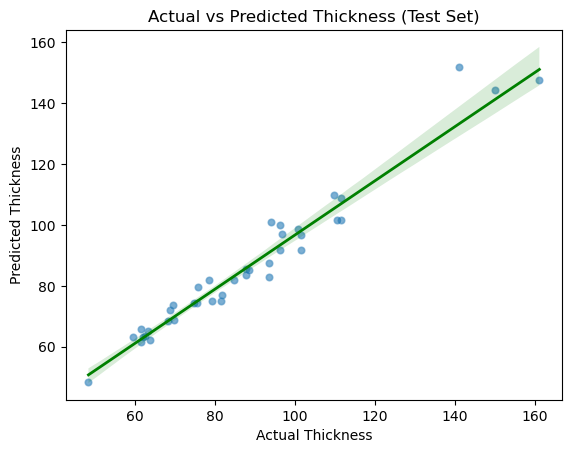

In [6]:
best_model, y_pred, test_pred = SP.summarize(metric='RMSE')

# Standard_w_B
Top, Bot RGB 평균 -> Thickness 예측

In [7]:
trial_name = 'tpot_Standard_w_B/'
dataset = pd.read_csv('../data/Standard_w_B.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = None
test_size = 0.3
random_state = 42

SP = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [8]:
SP.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -48.41376843749795

Generation 2 - Current best internal CV score: -48.41376843749795

Generation 3 - Current best internal CV score: -48.41376843749795

Generation 4 - Current best internal CV score: -48.41376843749795

Generation 5 - Current best internal CV score: -48.41376843749795

Best pipeline: RidgeCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False))
R2        0.756915
RMSE     12.094100
MSE     146.267252
MAE       6.829493
MAPE      6.542949
Name: tpot, dtype: float64


In [9]:
SP.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
tpot,0.75691,12.0941,146.26725,6.82949,6.54295


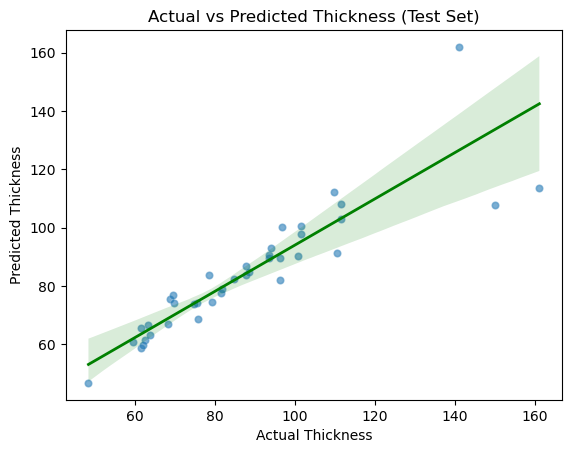

In [10]:
best_model, y_pred, test_pred = SP.summarize(metric='RMSE')

# Correction Methods


## Histogram Equalization

Top RGB 평균 + Histogram equalization -> Thickness 예측

In [11]:
trial_name = 'tpot_Histogram_Equalization/'
dataset = pd.read_csv('../data/Histogram_Equalization.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = None
test_size = 0.3
random_state = 42

SP = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [12]:
SP.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -336.9974884533574

Generation 2 - Current best internal CV score: -333.34676538068817

Generation 3 - Current best internal CV score: -333.09489986564887

Generation 4 - Current best internal CV score: -332.93117994668853

Generation 5 - Current best internal CV score: -329.3801366804975

Best pipeline: ExtraTreesRegressor(PCA(DecisionTreeRegressor(input_matrix, max_depth=3, min_samples_leaf=20, min_samples_split=19), iterated_power=5, svd_solver=randomized), bootstrap=True, max_features=0.25, min_samples_leaf=8, min_samples_split=16, n_estimators=100)
R2       -0.017415
RMSE     24.742479
MSE     612.190285
MAE      18.675401
MAPE     21.138506
Name: tpot, dtype: float64


In [13]:
SP.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
tpot,-0.01741,24.74248,612.19028,18.6754,21.13851


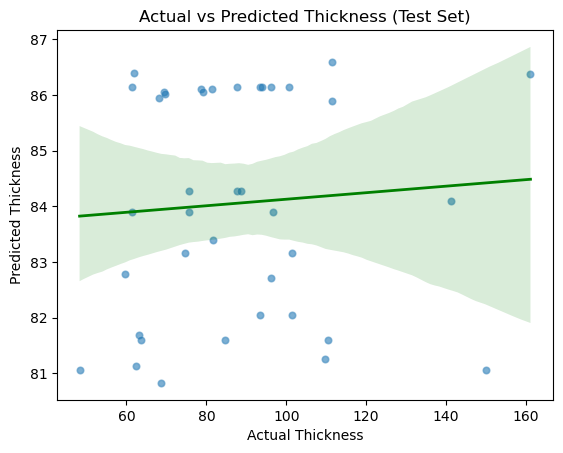

In [14]:
best_model, y_pred, test_pred = SP.summarize(metric='RMSE')

## Histogram Equalization with Bot

Top, Bot RGB 평균 + Histogram equalization -> Thickness 예측

In [15]:
import sys
sys.path.append('../') 

In [16]:
trial_name = 'tpot_Histogram_Equalization_w_B/'
dataset = pd.read_csv('../data/Histogram_Equalization_w_B.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
test_size = 0.3
random_state = 42

SP = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [17]:
SP.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -331.81460735406654

Generation 2 - Current best internal CV score: -331.81460735406654

Generation 3 - Current best internal CV score: -318.3178204886562

Generation 4 - Current best internal CV score: -318.3178204886562

Generation 5 - Current best internal CV score: -318.16032537326873

Best pipeline: KNeighborsRegressor(StandardScaler(input_matrix), n_neighbors=55, p=1, weights=distance)
R2       -0.003588
RMSE     24.573774
MSE     603.870371
MAE      18.148419
MAPE     20.382234
Name: tpot, dtype: float64


In [18]:
SP.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
tpot,-0.00359,24.57377,603.87037,18.14842,20.38223


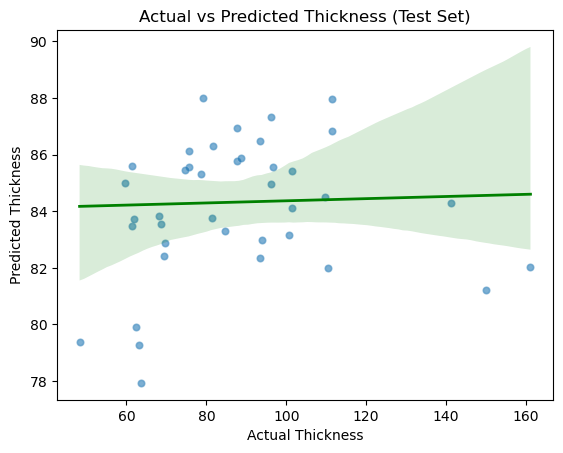

In [19]:
best_model, y_pred, test_pred = SP.summarize(metric='RMSE')

## Zscore Normalization

Top RGB 평균 + Zscore Normalization -> Thickness 예측

In [20]:
trial_name = 'tpot_Zscore_Normalization/'
dataset = pd.read_csv('../data/Zscore_Normalization.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
test_size = 0.3
random_state = 42

SP = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [21]:
SP.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.8, learning_rate=0.001, loss=huber, max_depth=7, max_features=0.3, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.25)
R2       -0.055107
RMSE     25.196631
MSE     634.870212
MAE      18.744868
MAPE     20.799861
Name: tpot, dtype: float64


In [ ]:
SP.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
MLPRegressor,-0.00557,24.59808,605.06539,18.71271,21.74366
CatBoostRegressor,-0.02905,24.88353,619.19008,18.70123,21.13579
LGBMRegressor,-0.02951,24.88907,619.46584,18.71369,21.14806
RandomForestRegressor,-0.02997,24.89464,619.74299,18.55342,20.89565
GradientBoostingRegressor,-0.03005,24.89565,619.79349,18.62030,21.12412
XGBRegressor,-0.06755,25.34482,642.35989,19.50930,22.23338
DecisionTreeRegressor,-0.07079,25.38316,644.30496,19.30353,21.80747
AdaBoostRegressor,-0.07525,25.43603,646.99147,19.46988,21.85494
KNeighborsRegressor,-0.08768,25.58265,654.47202,19.01203,21.55769


Best Model: MLPRegressor
Best hyperparams: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': [100, 100], 'learning_rate': 'constant', 'solver': 'sgd'}
Best performance: R2       -0.005574
RMSE     24.598077
MSE     605.065388
MAE      18.712708
MAPE     21.743657
Name: MLPRegressor, dtype: float64


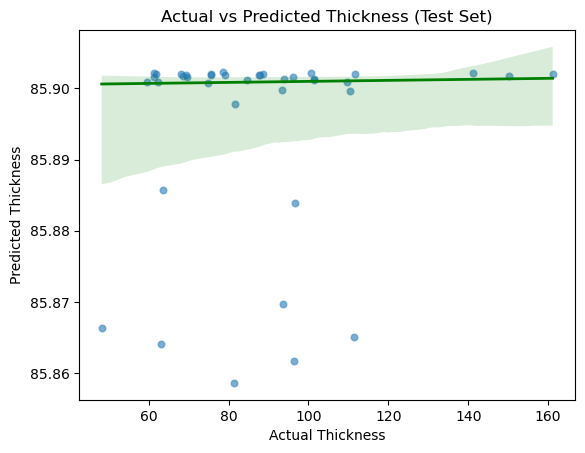

In [ ]:
best_model, y_pred, test_pred = SP.summarize(metric='RMSE')

## Zscore Normalization with Bot

Top, Bot RGB 평균 + Zscore Normalization -> Thickness 예측

In [ ]:
trial_name = 'tpot_Zscore_Normalization_w_B/'
dataset = pd.read_csv('../data/Zscore_Normalization_w_B.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
test_size = 0.3
random_state = 42

SP = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [ ]:
SP.fit()

Except model >> LinearRegression
Except model >> Ridge
Except model >> Lasso
Except model >> ElasticNet
Except model >> BayesianRidge
Except model >> ARDRegression
Except model >> SGDRegressor
Except model >> SVR
Model not found. Training the model >> RandomForestRegressor


Time consumed loading/training model :: 227.91 s
BEST PARAMS >> RandomForestRegressor: OrderedDict([('max_depth', 30), ('max_features', 'log2'), ('min_samples_leaf', 17), ('min_samples_split', 20), ('n_estimators', 50)])
**************************************************


R2       -0.014004
RMSE     24.700972
MSE     610.138003
MAE      18.415378
MAPE     20.790844
Name: RandomForestRegressor, dtype: float64
Model not found. Training the model >> GradientBoostingRegressor


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\a

Time consumed loading/training model :: 123.11 s
BEST PARAMS >> GradientBoostingRegressor: OrderedDict([('learning_rate', 0.0022316111652102054), ('max_depth', 30), ('max_features', 'auto'), ('min_samples_leaf', 1), ('min_samples_split', 20), ('n_estimators', 50)])
**************************************************


R2       -0.050590
RMSE     25.142641
MSE     632.152389
MAE      18.927460
MAPE     21.581239
Name: GradientBoostingRegressor, dtype: float64
Model not found. Training the model >> AdaBoostRegressor
Time consumed loading/training model :: 109.67 s
BEST PARAMS >> AdaBoostRegressor: OrderedDict([('learning_rate', 0.001), ('n_estimators', 50)])
**************************************************


R2       -0.485177
RMSE     29.893946
MSE     893.648003
MAE      20.845634
MAPE     25.019916
Name: AdaBoostRegressor, dtype: float64
Model not found. Training the model >> XGBRegressor
Time consumed loading/training model :: 102.09 s
BEST PARAMS >> XGBRegressor: OrderedDict([('col

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1471 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    return self._fit(X, y, incremental=False)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 491, in _fit
    raise ValueError(

In [ ]:
SP.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
RandomForestRegressor,-0.01400,24.70097,610.13800,18.41538,20.79084
MLPRegressor,-0.02946,24.88854,619.43943,18.71360,21.14902
LGBMRegressor,-0.02951,24.88907,619.46584,18.71369,21.14806
CatBoostRegressor,-0.03103,24.90752,620.38448,18.72180,21.15678
DecisionTreeRegressor,-0.03952,25.00985,625.49264,18.88343,21.43386
GradientBoostingRegressor,-0.05059,25.14264,632.15239,18.92746,21.58124
XGBRegressor,-0.05687,25.21772,635.93321,18.77313,20.94094
KNeighborsRegressor,-0.10678,25.80621,665.96061,18.97682,21.38942
AdaBoostRegressor,-0.48518,29.89395,893.64800,20.84563,25.01992


Best Model: RandomForestRegressor
Best hyperparams: OrderedDict([('max_depth', 30), ('max_features', 'log2'), ('min_samples_leaf', 17), ('min_samples_split', 20), ('n_estimators', 50)])
Best performance: R2       -0.014004
RMSE     24.700972
MSE     610.138003
MAE      18.415378
MAPE     20.790844
Name: RandomForestRegressor, dtype: float64


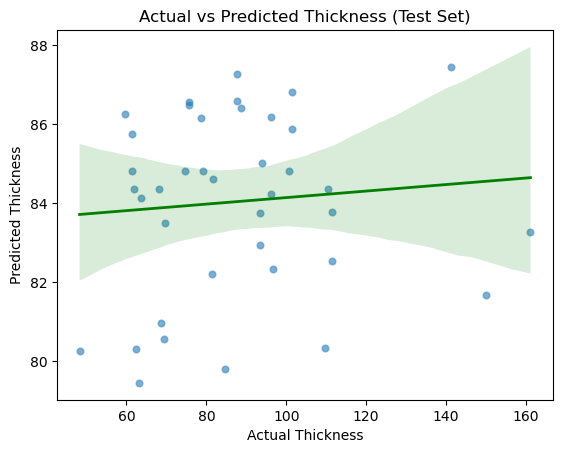

In [ ]:
best_model, y_pred, test_pred = SP.summarize(metric='RMSE')

## MinMax Normalization

Top RGB 평균 + MinMax Normalization -> Thickness 예측

In [ ]:
trial_name = 'tpot_MinMax_Normalization/'
dataset = pd.read_csv('../data/MinMax_Normalization.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
test_size = 0.3
random_state = 42

SP = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [ ]:
SP.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -337.84576328637644


In [ ]:
SP.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
CatBoostRegressor,-0.02905,24.88353,619.19008,18.70123,21.13579
LGBMRegressor,-0.02951,24.88907,619.46584,18.71369,21.14806
GradientBoostingRegressor,-0.02972,24.89167,619.59542,18.61580,21.11899
MLPRegressor,-0.04653,25.09401,629.70949,18.74022,20.91246
AdaBoostRegressor,-0.06429,25.30602,640.39452,19.11470,21.44255
XGBRegressor,-0.06755,25.34482,642.35989,19.50930,22.23338
RandomForestRegressor,-0.08038,25.49663,650.07812,19.37560,21.87997
KNeighborsRegressor,-0.08768,25.58265,654.47202,19.01203,21.55769
DecisionTreeRegressor,-0.14934,26.29776,691.57234,19.95686,22.65257


Best Model: CatBoostRegressor
Best hyperparams: OrderedDict([('depth', 10), ('iterations', 50), ('learning_rate', 0.001)])
Best performance: R2       -0.029048
RMSE     24.883530
MSE     619.190083
MAE      18.701232
MAPE     21.135794
Name: CatBoostRegressor, dtype: float64


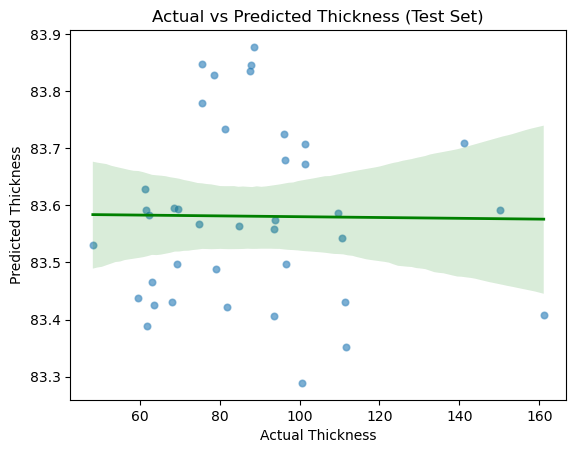

In [ ]:
best_model, y_pred, test_pred = SP.summarize(metric='RMSE')

## MinMax Normalization with Bot

Top, Bot RGB 평균 + MinMax Normalization -> Thickness 예측

In [ ]:
trial_name = 'tpot_MinMax_Normalization_w_B/'
dataset = pd.read_csv('../data/MinMax_Normalization_w_B.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
test_size = 0.3
random_state = 42

SP = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [ ]:
SP.fit()

Except model >> LinearRegression
Except model >> Ridge
Except model >> Lasso
Except model >> ElasticNet
Except model >> BayesianRidge
Except model >> ARDRegression
Except model >> SGDRegressor
Except model >> SVR
Model not found. Training the model >> RandomForestRegressor


Time consumed loading/training model :: 246.87 s
BEST PARAMS >> RandomForestRegressor: OrderedDict([('max_depth', 3), ('max_features', 'log2'), ('min_samples_leaf', 20), ('min_samples_split', 20), ('n_estimators', 500)])
**************************************************


R2       -0.013814
RMSE     24.698660
MSE     610.023807
MAE      18.547634
MAPE     20.911948
Name: RandomForestRegressor, dtype: float64
Model not found. Training the model >> GradientBoostingRegressor


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\a

Time consumed loading/training model :: 125.07 s
BEST PARAMS >> GradientBoostingRegressor: OrderedDict([('learning_rate', 0.0033643967764044893), ('max_depth', 30), ('max_features', 'auto'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 50)])
**************************************************


R2       -0.061740
RMSE     25.275706
MSE     638.861299
MAE      18.837643
MAPE     21.464547
Name: GradientBoostingRegressor, dtype: float64
Model not found. Training the model >> AdaBoostRegressor
Time consumed loading/training model :: 122.21 s
BEST PARAMS >> AdaBoostRegressor: OrderedDict([('learning_rate', 0.001), ('n_estimators', 50)])
**************************************************


R2       -0.507234
RMSE     30.115112
MSE     906.919956
MAE      21.174584
MAPE     25.445206
Name: AdaBoostRegressor, dtype: float64
Model not found. Training the model >> XGBRegressor
Time consumed loading/training model :: 99.40 s
BEST PARAMS >> XGBRegressor: OrderedDict([('colsa

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1483 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    return self._fit(X, y, incremental=False)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 491, in _fit
    raise ValueError(

In [ ]:
SP.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
DecisionTreeRegressor,0.00252,24.49888,600.19510,18.04206,20.50782
RandomForestRegressor,-0.01381,24.69866,610.02381,18.54763,20.91195
LGBMRegressor,-0.02951,24.88907,619.46584,18.71369,21.14806
CatBoostRegressor,-0.03103,24.90752,620.38448,18.72180,21.15678
XGBRegressor,-0.05687,25.21772,635.93321,18.77313,20.94094
GradientBoostingRegressor,-0.06174,25.27571,638.86130,18.83764,21.46455
KNeighborsRegressor,-0.10678,25.80621,665.96061,18.97682,21.38942
MLPRegressor,-0.21586,27.04807,731.59803,19.69187,20.53476
AdaBoostRegressor,-0.50723,30.11511,906.91996,21.17458,25.44521


Best Model: DecisionTreeRegressor
Best hyperparams: OrderedDict([('max_depth', 26), ('max_features', 'log2'), ('min_samples_leaf', 20), ('min_samples_split', 20)])
Best performance: R2        0.002520
RMSE     24.498880
MSE     600.195097
MAE      18.042059
MAPE     20.507821
Name: DecisionTreeRegressor, dtype: float64


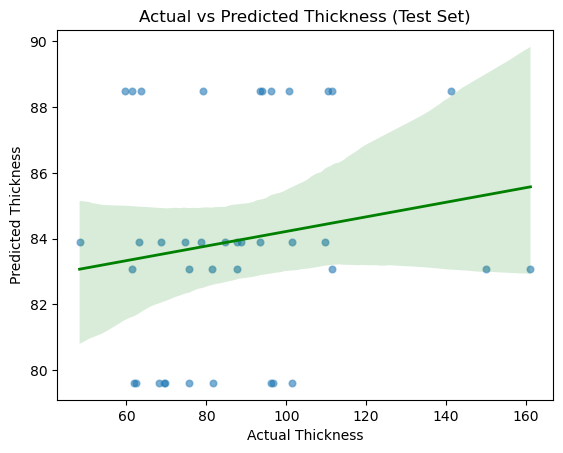

In [ ]:
best_model, y_pred, test_pred = SP.summarize(metric='RMSE')